<a href="https://colab.research.google.com/github/fiftybucks101/Naive-Baye-s/blob/main/Multinomial_Naive_Bayes_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
data.DESCR # It describes the dataset

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [ ]:
# Defining all the categories

categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Training data on the above categories

train = fetch_20newsgroups(subset='train',categories=categories)

# Testing the data for these categories

test = fetch_20newsgroups(subset='test',categories=categories)


# printing training data

print(train.data[1000])
print(len(train.data)) # number of articles in training data
print(train.target_names)

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# Importing necessary packages

from sklearn.feature_extraction.text import TfidfVectorizer # is a ML algo that convert article texts into meaningful number for ML calculations
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# creatintg a model based on Multinomial Naive Bayes

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

# Training the model with the train data

model.fit(train.data,train.target)

# creating labels for the test data

labels = model.predict(test.data)

Text(77.92222222222226, 0.5, 'predicted label')

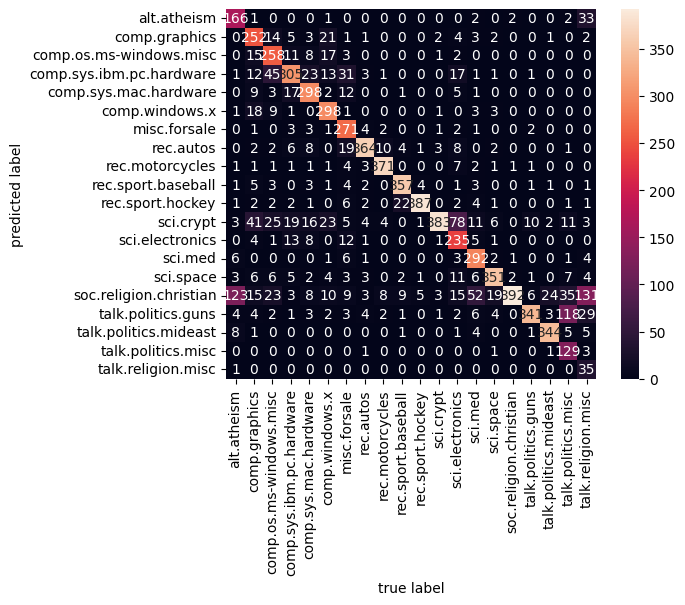

In [ ]:
# creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=True, xticklabels=train.target_names, yticklabels=train.target_names)

# plotting Heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score = ",accuracy_score(test.target,labels))
print("Classification Report",classification_report(test.target,labels))

Accuracy Score =  0.7738980350504514
Classification Report               precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.6

In [ ]:
print(len(test.target))

7532


In [ ]:
print((test.target))
print(labels)

[ 7  5  0 ...  9  6 15]
[ 7 11  0 ...  9  3 15]


In [ ]:
print(len(labels))

7532


In [ ]:
# function which takes ML model to predict our categories
def predict(s,train=train,model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]


In [ ]:
predict('my name is windows xp')

'comp.os.ms-windows.misc'

In [ ]:
predict('Osho is a good guru')

'sci.crypt'

In [ ]:
predict('war is destruction')

'talk.politics.mideast'

In [ ]:
predict('sports cars are cool')

'rec.autos'